# New Section

In [ ]:
!pip install simplejson

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.8/136.8 KB 3.1 MB/s eta 0:00:00


In [ ]:
# Import the necessary libraries
import urllib.request
import shutil

# Set the URL of the file to download
url = "http://snap.stanford.edu/data/amazon/Electronics.txt.gz"

# Set the local file path to save the downloaded file
local_file_path = "/content/Electronics.txt.gz"

# Download the file from the URL and save it to the local file path
with urllib.request.urlopen(url) as response, open(local_file_path, 'wb') as out_file:
    shutil.copyfileobj(response, out_file)


In [ ]:
import gzip
import simplejson
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

In [ ]:
!pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 91.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 108.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import torch
import transformers
from sklearn.model_selection import train_test_split
from transformers import DistilBertModel, DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments


In [ ]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
with gzip.open('/content/Electronics.txt.gz', 'rt') as file:
    lines = file.readlines()

In [ ]:
lines

['product/productId: B0000630MQ\n',
 'product/title: Kodak Max K2000 Battery Charger with 4 NiMH AA Batteries\n',
 'product/price: unknown\n',
 'review/userId: A2F6FARSB1VL6Q\n',
 'review/profileName: "frumpy16"\n',
 'review/helpfulness: 2/2\n',
 'review/score: 5.0\n',
 'review/time: 1072915200\n',
 'review/summary: Great charger\n',
 'review/text: I recently bought this charger kit from Amazon and I am quite happy with my purchase. The folding plug is nice for storage. The included 1850 mAh batteries last for a long time in my Nikon Coolpix 2100. One of the best features of the charger is that each battery is charged separately (as opposed to in pairs) so that each battery gets just the right amount of charge. The short 3 hour charge time is great as well. The batteries do not get overly warm while charging either.Overall, this is a good charger for a good price. If you have a high drain device, the Kodak K2000 should keep you playing for a long time.\n',
 '\n',
 'product/productId: B

In [ ]:
data = [{}]
for line in lines:
    if line.startswith('product/') or line.startswith('review/'):
        key, value = line.strip().split(':', 1)  # split on the first colon only
        data[-1][key] = value.strip()
    else:
        data.append({})

In [ ]:
df = pd.DataFrame(data)
df

product/productId                                      product/title  \
0              B0000630MQ  Kodak Max K2000 Battery Charger with 4 NiMH AA...   
1              B0000630MQ  Kodak Max K2000 Battery Charger with 4 NiMH AA...   
2              B0000630MQ  Kodak Max K2000 Battery Charger with 4 NiMH AA...   
3              B0000630MQ  Kodak Max K2000 Battery Charger with 4 NiMH AA...   
4              B0000630MQ  Kodak Max K2000 Battery Charger with 4 NiMH AA...   
...                   ...                                                ...   
1241774        B000051JUL                          3Com Audrey Web Appliance   
1241775        B000051JUL                          3Com Audrey Web Appliance   
1241776        B000063W56  Sony ACCCSP Starter Kit for DSCP3 & DSCP5 Digi...   
1241777        B000063W56  Sony ACCCSP Starter Kit for DSCP3 & DSCP5 Digi...   
1241778               NaN                                                NaN   

        product/price   review/userId review/profileName review/helpfulness  \
0             unknown  A2F6FARSB1VL6Q         "frumpy16"                2/2   
1             unknown         unknown            unknown                2/2   
2             unknown  A3P56Q3XEGTBNY      Yisheng Zhang                1/1   
3             unknown         unknown            unknown                3/4   
4             unknown   AZIM9ZTGB8Q12           G. Evans                0/0   
...               ...             ...                ...                ...   
1241774       unknown         unknown            unknown                4/5   
1241775       unknown   AZ2VE6AZ4EW8Q            JMO9876                1/1   
1241776         99.20   AA2CXRGE0GN1S          Y. Hu "Y"                1/1   
1241777         99.20  A3LIWM4DA1TOOP         Y Al-Saleh                1/3   
1241778           NaN             NaN                NaN                NaN   

        review/score review/time                             review/summary  \
0                5.0  1072915200                              Great charger   
1                5.0  1058745600             Super product! I'm very happy.   
2                2.0  1127088000         Problem with charging smaller AAAs   
3                5.0  1068768000               CHECK OUT THE K6000 CHARGER!   
4                5.0  1274313600  Finally a Great recharger with batteries!   
...              ...         ...                                        ...   
1241774          1.0  1010966400    This item was discontinued in May 2001.   
1241775          1.0   985651200                          NOT user friendly   
1241776          5.0  1024963200      Case, Battery and 32 Meg Memory Stick   
1241777          5.0  1023235200                       Sony DSC Starter kit   
1241778          NaN         NaN                                        NaN   

                                               review/text  
0        I recently bought this charger kit from Amazon...  
1        The batteries are excellent (1850's), and the ...  
2        I have had the charger for more than two years...  
3        Greetings. Kodak also has a K6000 charger whic...  
4        I have used and recharged my batteries nearly ...  
...                                                    ...  
1241774  This is not a good buy! Here is a clip from th...  
1241775  We bought this for our Mom with high expectaio...  
1241776  I bought this item because I thought there was...  
1241777  This is a great kit , has all the essentials a...  
1241778                                                NaN  

[1241779 rows x 10 columns]

In [ ]:
df.isnull().sum()

product/productId     1
product/title         1
product/price         1
review/userId         1
review/profileName    1
review/helpfulness    1
review/score          1
review/time           1
review/summary        1
review/text           1
dtype: int64

In [ ]:
# drop rows with null values
df = df.dropna()

In [ ]:
df.isnull().sum()

product/productId     0
product/title         0
product/price         0
review/userId         0
review/profileName    0
review/helpfulness    0
review/score          0
review/time           0
review/summary        0
review/text           0
dtype: int64

In [ ]:
# randomly select 50,000 rows with a random state of 42
sampled_df = df.sample(n=10000, random_state=42)

# process your sampled data frame here


In [ ]:
Review=sampled_df.copy()

In [ ]:
# reset the index and delete the old index
Review = Review.reset_index(drop=True)

In [ ]:
Review.head()

product/productId                                    product/title  \
0        B00028Y826            Creative MuVo TX FM 256 MB MP3 Player   
1        B0002WPSCG                Logitech X-530 5.1 Speaker System   
2        B0002SAF3M    Logitech V500 Cordless Optical Notebook Mouse   
3        B0007QARCS  RCA CC-431 SLA Camcorder Battery from Batteries   
4        B00012FVYC                           Lowepro Rezo 30 -Black   

  product/price   review/userId       review/profileName review/helpfulness  \
0       unknown   AE9P1QX9RIRSE                   KlessS                0/0   
1       unknown  A1R4SOPHGJ4H89        Sathya Srinivasan                0/0   
2       unknown  A3MEWI6VUBHXDQ  Derick Centeno "Derick"                0/0   
3         21.13   A1LWKLQWSDUC6                Metrostar                0/0   
4         11.83  A200MI041OYY4C                 Rick_ATL                9/9   

  review/score review/time                      review/summary  \
0          5.0  1166140800                  Love these things!   
1          5.0  1178409600  Great product for a moderate price   
2          5.0  1283299200                   The superior V500   
3          5.0  1331164800                        Good Battery   
4          5.0  1287532800   Perfect For Panasonic ZS7 Camera!   

                                         review/text  
0  Ipod be damned. Does the necessaries with no f...  
1  This is a great product for a moderate price. ...  
2  The Logitech V500 is a true 3-button wireless ...  
3  Does exactly what it meant to. Very good price...  
4  This case was suggested elsewhere as a complim...

In [ ]:
# remove the specified columns
columns_to_remove = ['product/productId', 'product/title', 'product/price', 'review/userId',
                     'review/profileName', 'review/helpfulness', 'review/time', 'review/summary']
Review = Review.drop(columns=columns_to_remove)

In [ ]:
Review

review/score                                        review/text
0             5.0  Ipod be damned. Does the necessaries with no f...
1             5.0  This is a great product for a moderate price. ...
2             5.0  The Logitech V500 is a true 3-button wireless ...
3             5.0  Does exactly what it meant to. Very good price...
4             5.0  This case was suggested elsewhere as a complim...
...           ...                                                ...
9995          5.0  I just want to say that I am very pleased with...
9996          5.0  This is an excellent product for use if you ar...
9997          5.0  This was a replacement camera since my grandda...
9998          5.0  I own 2 of these, and I just bought 2 more for...
9999          5.0  I have now had this printer for 20 months and ...

[10000 rows x 2 columns]

In [ ]:
# replace decimal values in the review/score column with their corresponding integer values
Review['User_Mlabel'] = Review['review/score'].replace({'5.0': 4, '4.0': 3, '3.0': 2, '2.0': 1, '1.0': 0})
Review['User_label'] = Review['review/score'].replace({'5.0': 5, '4.0': 4, '3.0': 3, '2.0': 2, '1.0': 1})

In [ ]:
Review

review/score                                        review/text  \
0             5.0  Ipod be damned. Does the necessaries with no f...   
1             5.0  This is a great product for a moderate price. ...   
2             5.0  The Logitech V500 is a true 3-button wireless ...   
3             5.0  Does exactly what it meant to. Very good price...   
4             5.0  This case was suggested elsewhere as a complim...   
...           ...                                                ...   
9995          5.0  I just want to say that I am very pleased with...   
9996          5.0  This is an excellent product for use if you ar...   
9997          5.0  This was a replacement camera since my grandda...   
9998          5.0  I own 2 of these, and I just bought 2 more for...   
9999          5.0  I have now had this printer for 20 months and ...   

      User_Mlabel  User_label  
0               4           5  
1               4           5  
2               4           5  
3               4           5  
4               4           5  
...           ...         ...  
9995            4           5  
9996            4           5  
9997            4           5  
9998            4           5  
9999            4           5  

[10000 rows x 4 columns]

In [ ]:
# Review.to_csv('Show.csv',index=False)

In [ ]:
# Review['review/text'][0]

'Ipod be damned. Does the necessaries with no fuss. A bit tricky for my fat fingers, but I would never buy the Nano or Ipod over this. Yes, the volume is a tad low, and the included earbuds are weak. Durable, well designed software, good battery life, good FM tuner.'

In [ ]:
# Review['review/score'].dtype

dtype('O')

In [ ]:
# Review['review/score'].unique()

array(['5.0', '2.0', '3.0', '4.0', '1.0'], dtype=object)

In [ ]:
# Review['review/label'].dtype

dtype('int64')

In [ ]:
# Review['review/label'].unique()

array([4, 1, 2, 3, 0])

In [ ]:
# # sum the unique values in the review/score column
# unique_scores = Review['review/label'].unique()
# total_score = sum(unique_scores)

In [ ]:
# total_score

10

In [ ]:
df=Review.copy()

In [ ]:
# rename the review/score and review/text columns
df = df.rename(columns={'review/score': 'User_Rating', 'review/text': 'Review'})


In [ ]:
df

User_Rating                                             Review  \
0            5.0  Ipod be damned. Does the necessaries with no f...   
1            5.0  This is a great product for a moderate price. ...   
2            5.0  The Logitech V500 is a true 3-button wireless ...   
3            5.0  Does exactly what it meant to. Very good price...   
4            5.0  This case was suggested elsewhere as a complim...   
...          ...                                                ...   
9995         5.0  I just want to say that I am very pleased with...   
9996         5.0  This is an excellent product for use if you ar...   
9997         5.0  This was a replacement camera since my grandda...   
9998         5.0  I own 2 of these, and I just bought 2 more for...   
9999         5.0  I have now had this printer for 20 months and ...   

      User_Mlabel  User_label  
0               4           5  
1               4           5  
2               4           5  
3               4           5  
4               4           5  
...           ...         ...  
9995            4           5  
9996            4           5  
9997            4           5  
9998            4           5  
9999            4           5  

[10000 rows x 4 columns]

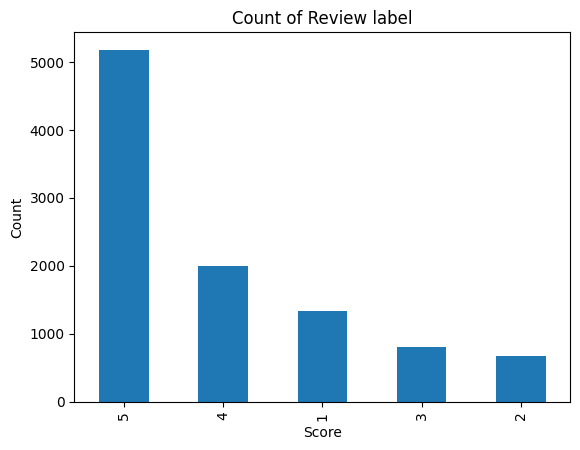

In [ ]:
# plot a bar chart of the count of each score value
df['User_label'].value_counts().plot.bar()

# set the title and axis labels
plt.title('Count of Review label')
plt.xlabel('Score')
plt.ylabel('Count')

# display the plot
plt.show()

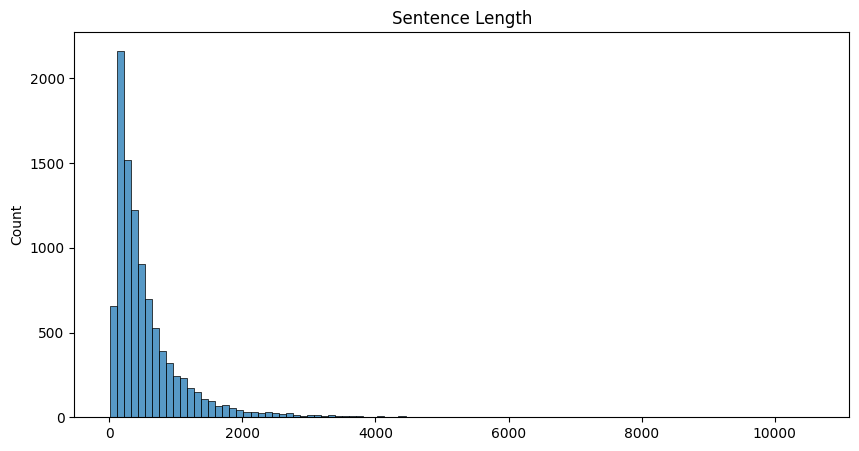

In [ ]:
#need equal length sentences
#plot hist of sentence length
plt.figure(figsize=(10, 5))
sns.histplot([len(s) for s in df.Review], bins=100)
plt.title('Sentence Length')
plt.show()

In [ ]:
Review_lengths = [len(s) for s in df['Review']]
df_Review_lengths = pd.DataFrame({'Review Length': Review_lengths})
df_Review_lengths

Review Length
0               265
1               213
2              1280
3               110
4               288
...             ...
9995            200
9996             78
9997            249
9998            327
9999           2229

[10000 rows x 1 columns]

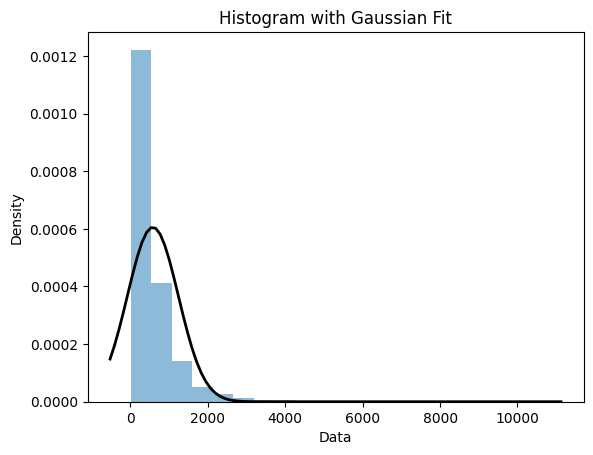

In [ ]:
# Generate random data
data = df_Review_lengths['Review Length']

# Fit a normal distribution to the data
mu, std = norm.fit(data)

# Create a histogram of the data
plt.hist(data, bins=20, density=True, alpha=0.5)

# Plot the probability density function (PDF) of the normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Add labels and title
plt.xlabel('Data')
plt.ylabel('Density')
plt.title('Histogram with Gaussian Fit')

# Show plot
plt.show()

In [ ]:
# Filter the DataFrame by the length of the 'Train Review' column being less than 4000
threshold_length = 4000
Threshold_df = df[df['Review'].apply(len) < threshold_length]

Threshold_df

User_Rating                                             Review  \
0            5.0  Ipod be damned. Does the necessaries with no f...   
1            5.0  This is a great product for a moderate price. ...   
2            5.0  The Logitech V500 is a true 3-button wireless ...   
3            5.0  Does exactly what it meant to. Very good price...   
4            5.0  This case was suggested elsewhere as a complim...   
...          ...                                                ...   
9995         5.0  I just want to say that I am very pleased with...   
9996         5.0  This is an excellent product for use if you ar...   
9997         5.0  This was a replacement camera since my grandda...   
9998         5.0  I own 2 of these, and I just bought 2 more for...   
9999         5.0  I have now had this printer for 20 months and ...   

      User_Mlabel  User_label  
0               4           5  
1               4           5  
2               4           5  
3               4           5  
4               4           5  
...           ...         ...  
9995            4           5  
9996            4           5  
9997            4           5  
9998            4           5  
9999            4           5  

[9943 rows x 4 columns]

##  VADER Sentiment Analysis 


In [ ]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Import SentimentIntensityAnalyzer and create an sid object
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [ ]:
# Obtain the sid scores for your review
sid.polarity_scores(Threshold_df['Review'][0])

{'neg': 0.176, 'neu': 0.596, 'pos': 0.228, 'compound': 0.7459}

In [ ]:
Threshold_df['Vader_Scores'] = Threshold_df['Review'].apply(lambda review: sid.polarity_scores(review))

Threshold_df['Vader_Compound']  = Threshold_df['Vader_Scores'].apply(lambda score_dict: score_dict['compound'])
Threshold_df

<ipython-input-33-ca29d0dc7f0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Threshold_df['Vader_Scores'] = Threshold_df['Review'].apply(lambda review: sid.polarity_scores(review))
<ipython-input-33-ca29d0dc7f0e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Threshold_df['Vader_Compound']  = Threshold_df['Vader_Scores'].apply(lambda score_dict: score_dict['compound'])


User_Rating                                             Review  \
0            5.0  Ipod be damned. Does the necessaries with no f...   
1            5.0  This is a great product for a moderate price. ...   
2            5.0  The Logitech V500 is a true 3-button wireless ...   
3            5.0  Does exactly what it meant to. Very good price...   
4            5.0  This case was suggested elsewhere as a complim...   
...          ...                                                ...   
9995         5.0  I just want to say that I am very pleased with...   
9996         5.0  This is an excellent product for use if you ar...   
9997         5.0  This was a replacement camera since my grandda...   
9998         5.0  I own 2 of these, and I just bought 2 more for...   
9999         5.0  I have now had this printer for 20 months and ...   

      User_Mlabel  User_label  \
0               4           5   
1               4           5   
2               4           5   
3               4           5   
4               4           5   
...           ...         ...   
9995            4           5   
9996            4           5   
9997            4           5   
9998            4           5   
9999            4           5   

                                           Vader_Scores  Vader_Compound  
0     {'neg': 0.176, 'neu': 0.596, 'pos': 0.228, 'co...          0.7459  
1     {'neg': 0.0, 'neu': 0.738, 'pos': 0.262, 'comp...          0.9090  
2     {'neg': 0.01, 'neu': 0.895, 'pos': 0.095, 'com...          0.9473  
3     {'neg': 0.0, 'neu': 0.712, 'pos': 0.288, 'comp...          0.8070  
4     {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'comp...          0.8033  
...                                                 ...             ...  
9995  {'neg': 0.055, 'neu': 0.782, 'pos': 0.163, 'co...          0.5689  
9996  {'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'comp...          0.5719  
9997  {'neg': 0.0, 'neu': 0.802, 'pos': 0.198, 'comp...          0.8639  
9998  {'neg': 0.0, 'neu': 0.841, 'pos': 0.159, 'comp...          0.8869  
9999  {'neg': 0.068, 'neu': 0.874, 'pos': 0.058, 'co...         -0.5531  

[9943 rows x 6 columns]

In [ ]:

def assign_category_Machine(vader_score):
    if vader_score < -0.6:
        return 0
    elif vader_score < -0.25:
        return 1
    elif vader_score < 0.25:
        return 2
    elif vader_score < 0.6:
        return 3
    else:
        return 4


In [ ]:
def assign_category(vader_score):
    if vader_score < -0.6:
        return 1
    elif vader_score < -0.25:
        return 2
    elif vader_score < 0.25:
        return 3
    elif vader_score < 0.6:
        return 4
    else:
        return 5

In [ ]:
Threshold_df['Vader_label'] = Threshold_df['Vader_Compound'].apply(assign_category)
Threshold_df['Vader_Mlabel'] = Threshold_df['Vader_Compound'].apply(assign_category_Machine)
Threshold_df

<ipython-input-36-1336e83becb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Threshold_df['Vader_label'] = Threshold_df['Vader_Compound'].apply(assign_category)
<ipython-input-36-1336e83becb9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Threshold_df['Vader_Mlabel'] = Threshold_df['Vader_Compound'].apply(assign_category_Machine)


User_Rating                                             Review  \
0            5.0  Ipod be damned. Does the necessaries with no f...   
1            5.0  This is a great product for a moderate price. ...   
2            5.0  The Logitech V500 is a true 3-button wireless ...   
3            5.0  Does exactly what it meant to. Very good price...   
4            5.0  This case was suggested elsewhere as a complim...   
...          ...                                                ...   
9995         5.0  I just want to say that I am very pleased with...   
9996         5.0  This is an excellent product for use if you ar...   
9997         5.0  This was a replacement camera since my grandda...   
9998         5.0  I own 2 of these, and I just bought 2 more for...   
9999         5.0  I have now had this printer for 20 months and ...   

      User_Mlabel  User_label  \
0               4           5   
1               4           5   
2               4           5   
3               4           5   
4               4           5   
...           ...         ...   
9995            4           5   
9996            4           5   
9997            4           5   
9998            4           5   
9999            4           5   

                                           Vader_Scores  Vader_Compound  \
0     {'neg': 0.176, 'neu': 0.596, 'pos': 0.228, 'co...          0.7459   
1     {'neg': 0.0, 'neu': 0.738, 'pos': 0.262, 'comp...          0.9090   
2     {'neg': 0.01, 'neu': 0.895, 'pos': 0.095, 'com...          0.9473   
3     {'neg': 0.0, 'neu': 0.712, 'pos': 0.288, 'comp...          0.8070   
4     {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'comp...          0.8033   
...                                                 ...             ...   
9995  {'neg': 0.055, 'neu': 0.782, 'pos': 0.163, 'co...          0.5689   
9996  {'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'comp...          0.5719   
9997  {'neg': 0.0, 'neu': 0.802, 'pos': 0.198, 'comp...          0.8639   
9998  {'neg': 0.0, 'neu': 0.841, 'pos': 0.159, 'comp...          0.8869   
9999  {'neg': 0.068, 'neu': 0.874, 'pos': 0.058, 'co...         -0.5531   

      Vader_label  Vader_Mlabel  
0               5             4  
1               5             4  
2               5             4  
3               5             4  
4               5             4  
...           ...           ...  
9995            4             3  
9996            4             3  
9997            5             4  
9998            5             4  
9999            2             1  

[9943 rows x 8 columns]

In [ ]:
print(Threshold_df['Vader_Mlabel'].dtypes)
print(Threshold_df['Vader_label'].dtypes)

int64
int64


In [ ]:
# remove the specified columns
columns_to_remove = ['Vader_Scores', 'User_Rating']
Threshold_df = Threshold_df.drop(columns=columns_to_remove)
Threshold_df.head()

Review  User_Mlabel  User_label  \
0  Ipod be damned. Does the necessaries with no f...            4           5   
1  This is a great product for a moderate price. ...            4           5   
2  The Logitech V500 is a true 3-button wireless ...            4           5   
3  Does exactly what it meant to. Very good price...            4           5   
4  This case was suggested elsewhere as a complim...            4           5   

   Vader_Compound  Vader_label  Vader_Mlabel  
0          0.7459            5             4  
1          0.9090            5             4  
2          0.9473            5             4  
3          0.8070            5             4  
4          0.8033            5             4

In [ ]:
Threshold_df['Review']

0       Ipod be damned. Does the necessaries with no f...
1       This is a great product for a moderate price. ...
2       The Logitech V500 is a true 3-button wireless ...
3       Does exactly what it meant to. Very good price...
4       This case was suggested elsewhere as a complim...
                              ...                        
9995    I just want to say that I am very pleased with...
9996    This is an excellent product for use if you ar...
9997    This was a replacement camera since my grandda...
9998    I own 2 of these, and I just bought 2 more for...
9999    I have now had this printer for 20 months and ...
Name: Review, Length: 9943, dtype: object

In [ ]:
Threshold_df = Threshold_df.reset_index(drop=True)


In [ ]:
print(Threshold_df.head(8))


                                              Review  User_Mlabel  User_label  \
0  Ipod be damned. Does the necessaries with no f...            4           5   
1  This is a great product for a moderate price. ...            4           5   
2  The Logitech V500 is a true 3-button wireless ...            4           5   
3  Does exactly what it meant to. Very good price...            4           5   
4  This case was suggested elsewhere as a complim...            4           5   
5  I read somewhere that sitting at a laptop and ...            4           5   
6  I've had this camera for about two years now a...            1           2   
7  The Kensington 62348 Contour Roller Carrying C...            4           5   

   Vader_Compound  Vader_label  Vader_Mlabel  
0          0.7459            5             4  
1          0.9090            5             4  
2          0.9473            5             4  
3          0.8070            5             4  
4          0.8033            5     

In [ ]:
Threshold_df.isnull().sum()

Review            0
User_Mlabel       0
User_label        0
Vader_Compound    0
Vader_label       0
Vader_Mlabel      0
dtype: int64

In [ ]:
Threshold_df.head(8)

Review  User_Mlabel  User_label  \
0  Ipod be damned. Does the necessaries with no f...            4           5   
1  This is a great product for a moderate price. ...            4           5   
2  The Logitech V500 is a true 3-button wireless ...            4           5   
3  Does exactly what it meant to. Very good price...            4           5   
4  This case was suggested elsewhere as a complim...            4           5   
5  I read somewhere that sitting at a laptop and ...            4           5   
6  I've had this camera for about two years now a...            1           2   
7  The Kensington 62348 Contour Roller Carrying C...            4           5   

   Vader_Compound  Vader_label  Vader_Mlabel  
0          0.7459            5             4  
1          0.9090            5             4  
2          0.9473            5             4  
3          0.8070            5             4  
4          0.8033            5             4  
5          0.5085            4             3  
6         -0.6934            1             0  
7          0.7906            5             4

In [ ]:
Threshold_df['Review'] = Threshold_df['Review'].astype(str)


In [ ]:
# Remove row with index 7588
Threshold_df = Threshold_df.drop(7588)

# Reset the index
Threshold_df = Threshold_df.reset_index(drop=True)

In [ ]:
Threshold_df

Review  User_Mlabel  \
0     Ipod be damned. Does the necessaries with no f...            4   
1     This is a great product for a moderate price. ...            4   
2     The Logitech V500 is a true 3-button wireless ...            4   
3     Does exactly what it meant to. Very good price...            4   
4     This case was suggested elsewhere as a complim...            4   
...                                                 ...          ...   
9937  I just want to say that I am very pleased with...            4   
9938  This is an excellent product for use if you ar...            4   
9939  This was a replacement camera since my grandda...            4   
9940  I own 2 of these, and I just bought 2 more for...            4   
9941  I have now had this printer for 20 months and ...            4   

      User_label  Vader_Compound  Vader_label  Vader_Mlabel  
0              5          0.7459            5             4  
1              5          0.9090            5             4  
2              5          0.9473            5             4  
3              5          0.8070            5             4  
4              5          0.8033            5             4  
...          ...             ...          ...           ...  
9937           5          0.5689            4             3  
9938           5          0.5719            4             3  
9939           5          0.8639            5             4  
9940           5          0.8869            5             4  
9941           5         -0.5531            2             1  

[9942 rows x 6 columns]

In [ ]:
from google.colab import files

# Save dataframe as CSV file
Threshold_df.to_csv('Threshold_df.csv', index=False)

# Download CSV file
files.download('Threshold_df.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
Threshold_df.to_csv('/content/Threshold.csv', index=False)


NameError: ignored

In [ ]:
import pandas as pd

#Threshold_df = pd.read_csv('/content/Threshold.csv')



Threshold_df = pd.read_csv('/content/Threshold_df.csv')

In [ ]:
# Re-index the dataframe and drop the old index
Threshold_df = Threshold_df.reset_index(drop=True)

In [ ]:
Threshold_df

Review  User_Mlabel  \
0     Ipod be damned. Does the necessaries with no f...            4   
1     This is a great product for a moderate price. ...            4   
2     The Logitech V500 is a true 3-button wireless ...            4   
3     Does exactly what it meant to. Very good price...            4   
4     This case was suggested elsewhere as a complim...            4   
...                                                 ...          ...   
9937  I just want to say that I am very pleased with...            4   
9938  This is an excellent product for use if you ar...            4   
9939  This was a replacement camera since my grandda...            4   
9940  I own 2 of these, and I just bought 2 more for...            4   
9941  I have now had this printer for 20 months and ...            4   

      User_label  Vader_Compound  Vader_label  Vader_Mlabel  
0              5          0.7459            5             4  
1              5          0.9090            5             4  
2              5          0.9473            5             4  
3              5          0.8070            5             4  
4              5          0.8033            5             4  
...          ...             ...          ...           ...  
9937           5          0.5689            4             3  
9938           5          0.5719            4             3  
9939           5          0.8639            5             4  
9940           5          0.8869            5             4  
9941           5         -0.5531            2             1  

[9942 rows x 6 columns]

In [ ]:
Threshold_df.isnull().sum()

Review            0
User_Mlabel       0
User_label        0
Vader_Compound    0
Vader_label       0
Vader_Mlabel      0
dtype: int64

In [ ]:
X=Threshold_df['Review']
y=Threshold_df['Vader_Mlabel']

In [ ]:
from sklearn.model_selection import train_test_split

#train test split
X_train, X_val, y_train, y_val = train_test_split(X, 
                                                   y,
                                                   test_size = 0.2,
                                                   random_state = 42,
                                                   stratify = y)

In [ ]:
X_train

5608    love these they save me so much money and many...
8829    Sure, this router is easy to setup. Simply rem...
195     Does the job and a good buy. Not a real decora...
1367    After about 1 hour with technical support (whi...
2130    I Ordered 6 of these summer '05, they are amaz...
                              ...                        
9332    This was a great little reader. I used it for ...
902     I'm using this with some pretty decent full ra...
9592    I don't like this unit. Pain to install behind...
6622    I followed the Setup Wizard instructions and e...
2510    There are numerous cases for Palm products and...
Name: Review, Length: 7953, dtype: object

In [ ]:
X_train.shape

(7953,)

In [ ]:
y_train.shape

(7953,)

In [ ]:
X_val.shape

(1989,)

In [ ]:
y_val.shape

(1989,)

In [ ]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)


In [ ]:
len(X_train)

7953

In [ ]:
len(y_train)

7953

In [ ]:
# Define the tokenizer
model_name = 'distilbert-base-uncased'
tokenizer = DistilBertTokenizerFast.from_pretrained(model_name, do_lower_case = True)

In [ ]:
num_labels = 5  # Set the number of class labels

In [ ]:
model = DistilBertForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'classifier.weight', 'pre_classi

In [ ]:
type(X_train), type(list(X_train))

(pandas.core.series.Series, list)

In [ ]:
train_encodings = tokenizer(list(X_train), truncation=True, padding=True)
val_encodings = tokenizer(list(X_val), truncation=True, padding=True)

train_dataset = []
for i in range(len(X_train)):
    item = {key: torch.tensor(val[i]) for key, val in train_encodings.items()}
    item['labels'] = torch.tensor(y_train[i])
    train_dataset.append(item)

val_dataset = []
for i in range(len(X_val)):
    item = {key: torch.tensor(val[i]) for key, val in val_encodings.items()}
    item['labels'] = torch.tensor(y_val[i])
    val_dataset.append(item)


In [ ]:
from torch.utils.data import DataLoader
from transformers import DistilBertForSequenceClassification, AdamW

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
device

device(type='cuda')

In [ ]:
import os


In [ ]:
model = model.to(device=device)

In [ ]:
model.train()

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [ ]:
train_dataloader = DataLoader(dataset=train_dataset, batch_size=6, shuffle=True)

In [ ]:
optim = AdamW(model.parameters(),lr=2e-5)

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from tqdm import tqdm
for epoch in range(2):
    for batch in tqdm(train_dataloader):
        optim.zero_grad()
        input_ids= batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs[0]
        loss.backward()
        optim.step()
    print(f"Loss for epoch {epoch} is {loss}")

model.eval()

100%|██████████| 1326/1326 [06:25<00:00,  3.44it/s]


Loss for epoch 0 is 0.053910646587610245


100%|██████████| 1326/1326 [06:26<00:00,  3.43it/s]

Loss for epoch 1 is 1.1975830793380737


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [ ]:
save_directory = "./"

In [ ]:
tokenizer.save_pretrained(save_directory)
model.save_pretrained(save_directory)

In [ ]:
#loading it back
# from transformers import TFAutoModel, AutoTokenizer
# tokenizer = AutoTokenizer.from_pretrained(save_directory)
# model = TFAutoModel.from_pretrained(save_directory, from_pt=True)

In [ ]:
from torch.utils.data import DataLoader

val_dataloader = DataLoader(val_dataset, batch_size=6, shuffle=False)


In [ ]:
model.eval()
total_correct = 0
total = 0
with torch.no_grad():
    for batch in val_dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1)
        total_correct += torch.sum(predictions == labels)
        total += len(labels)
val_acc = total_correct.item() / total
print(f"Validation accuracy: {val_acc}")


Validation accuracy: 0.751131221719457


In [ ]:
from sklearn.metrics import classification_report

model.eval()
total_correct = 0
total = 0
all_predictions = []
all_labels = []
with torch.no_grad():
    for batch in val_dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1)
        all_predictions.extend(predictions.tolist())
        all_labels.extend(labels.tolist())
        total_correct += torch.sum(predictions == labels)
        total += len(labels)
val_acc = total_correct.item() / total
print(f"Validation accuracy: {val_acc}")

# Print classification report
report = classification_report(all_labels, all_predictions)
print("Classification report:")
print(report)


Validation accuracy: 0.751131221719457
Classification report:
              precision    recall  f1-score   support

           0       0.47      0.81      0.60       154
           1       0.36      0.29      0.32       131
           2       0.62      0.43      0.51       211
           3       0.56      0.34      0.42       257
           4       0.87      0.93      0.90      1236

    accuracy                           0.75      1989
   macro avg       0.58      0.56      0.55      1989
weighted avg       0.74      0.75      0.74      1989

